IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE                   # For Oversampling
#from outliers import smirnov_grubbs as grubbs
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC


import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


READ & PARTITION DATA

In [2]:
dataset = pd.read_csv(r'E:\1.Naresh IT (DATA SCIENCE)\INSURANCE PROJECTS\Caravan-insurance-policy\caravan-insurance-challenge.csv')


var=16 

print(dataset.describe())
print('Variables selected :  ', list(dataset.columns.values[[3,10,16,25,29,31,33,40,41,42,43,44,47,59,61,68]]))

selected = dataset.columns.values[[3,10,16,25,29,31,33,40,41,42,43,44,47,59,61,68]]

X = (dataset[dataset.columns[[3,10,16,25,29,31,33,40,41,42,43,44,47,59,61,68]]].values)



# Normalization - Using MinMax Scaler
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

y = np.vstack(dataset['CARAVAN'].values)

print('\n')
print('X and y Input Data:   ', X.shape, y.shape)


X_train_original, X_test2, y_train_original, y_test2 = train_test_split(X, y, test_size=0.3,
                                                                        random_state=42)

print('Training Set Shape:   ', X_train_original.shape, y_train_original.shape)

X_val, X_test, y_val, y_test = train_test_split(X_test2, y_test2, test_size=0.33,random_state=42)
# Used Seed in Partitioning so that Test Set remains same for every Run

print('Validation Set Shape: ', X_val.shape,y_val.shape)
print('Test Set Shape:       ', X_test.shape, y_test.shape)

           MOSTYPE     MAANTHUI      MGEMOMV     MGEMLEEF     MOSHOOFD  \
count  9822.000000  9822.000000  9822.000000  9822.000000  9822.000000   
mean     24.253207     1.108735     2.677561     2.996437     5.779067   
std      12.918058     0.412101     0.780701     0.804660     2.874148   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%      10.000000     1.000000     2.000000     2.000000     3.000000   
50%      30.000000     1.000000     3.000000     3.000000     7.000000   
75%      35.000000     1.000000     3.000000     3.000000     8.000000   
max      41.000000    10.000000     6.000000     6.000000    10.000000   

            MGODRK       MGODPR       MGODOV       MGODGE       MRELGE  ...  \
count  9822.000000  9822.000000  9822.000000  9822.000000  9822.000000  ...   
mean      0.700672     4.637650     1.050092     3.262981     6.188964  ...   
std       1.015107     1.721212     1.011156     1.606287     1.896070  ...   
min       0.00000

OUTLIER DETECTION

In [3]:
#for i in range(var):
#    print((grubbs.test(X_train[:,i], alpha=0.025).reshape(-1)).shape)

###### Oversampling of underrepresented class

In [4]:
from imblearn.over_sampling import SMOTE

doOversampling = True

if doOversampling:
    # Apply regular SMOTE
    sm = SMOTE()
    X_train, y_train = sm.fit_resample(X_train_original, y_train_original)
    print('Training Set Shape after oversampling:', X_train.shape, y_train.shape)


Training Set Shape after oversampling: (12942, 16) (12942,)


###### Scatterplot for Variable Selection

C:\Users\DIMPLE\AppData\Local\Temp\ipykernel_13600\3359359204.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8, 2, i+1)


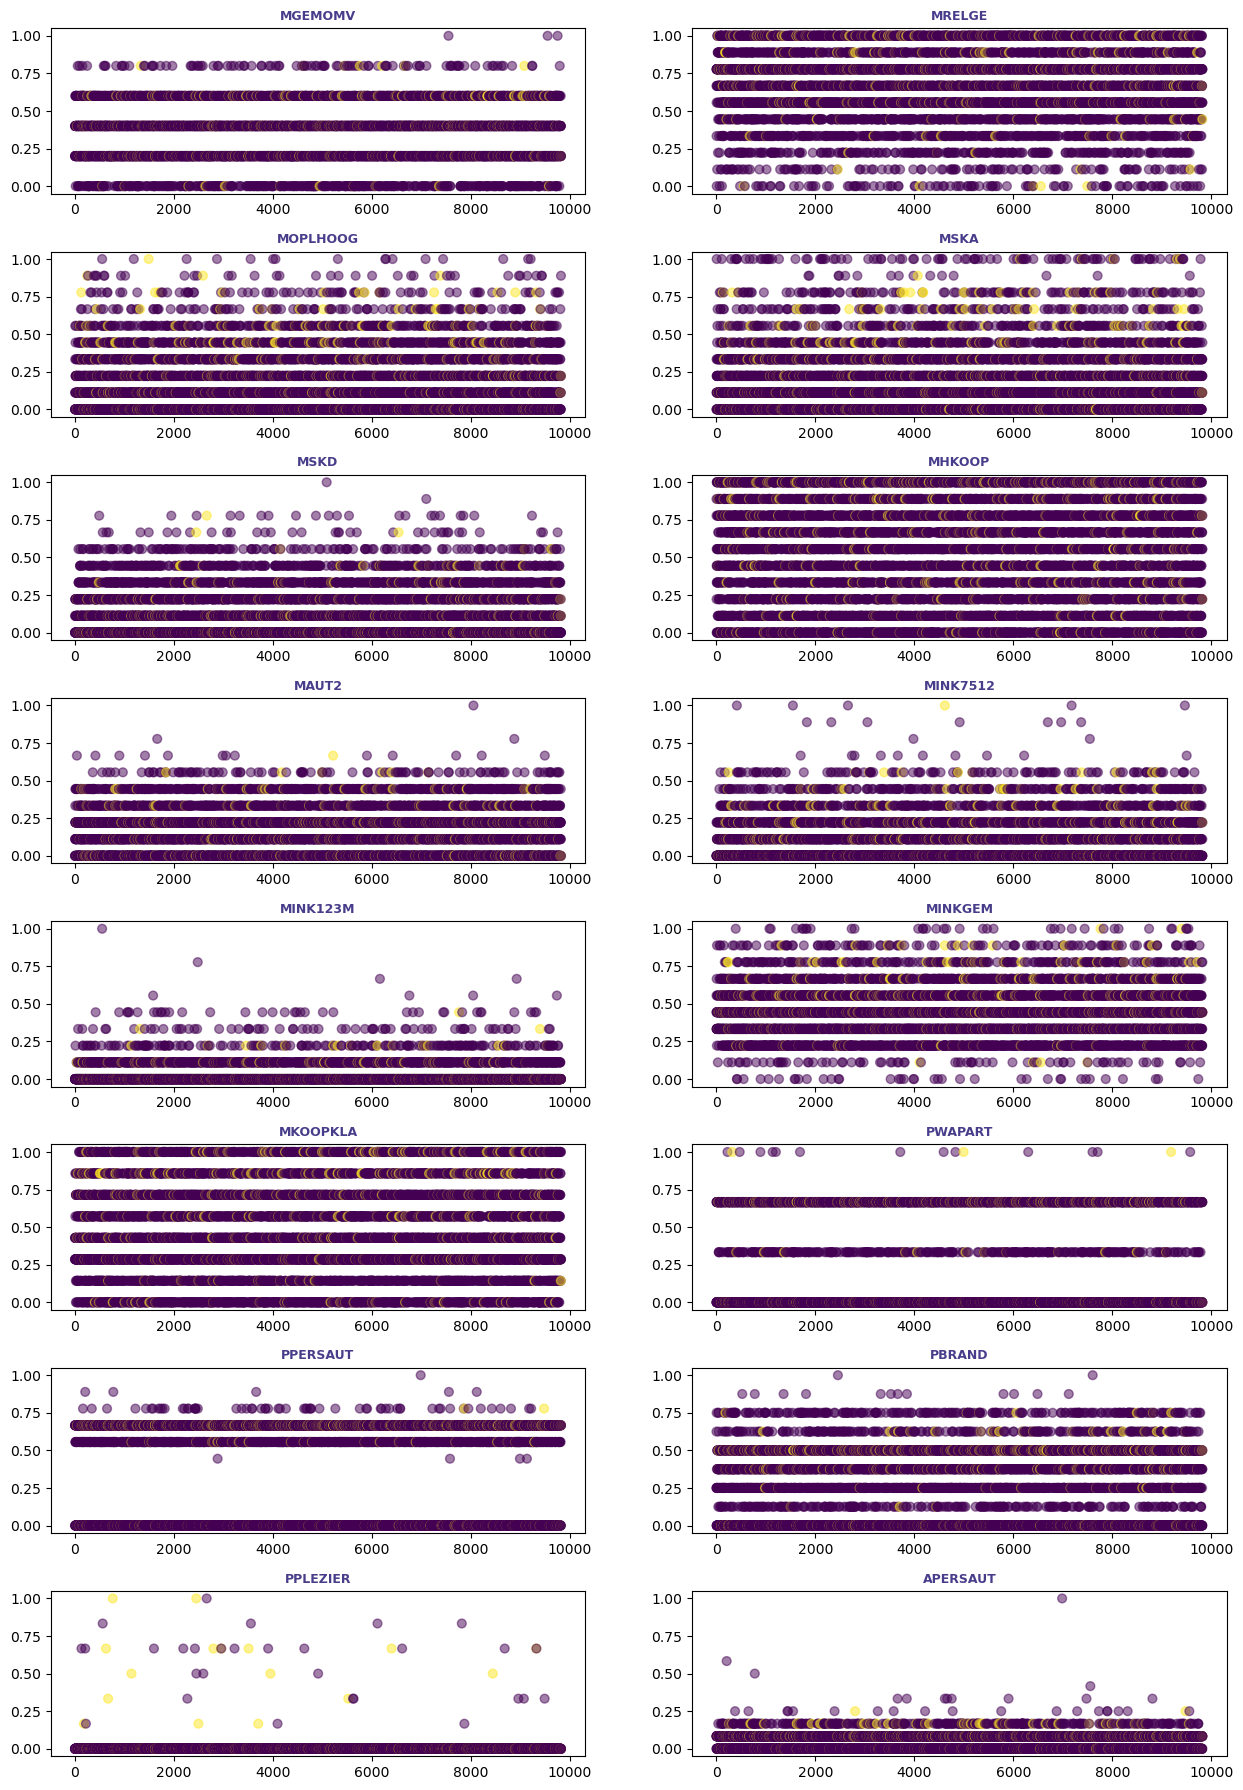

In [5]:
# Plot the feature importances of the forest

plt.figure(figsize=(6 * 2, 2.4 * int(var/2+.5)))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
plt.title("Variable Co-relation with Outcome",size=20)
for i in range(var):
    plt.subplot(8, 2, i+1)
    plt.title(selected[i], size=9,color='darkslateblue',fontweight='bold')
    plt.scatter(range(len(X)),X[:,i], s=40, marker= 'o',c=((y[:,0:1])+0).reshape(-1), alpha=0.5)
    plt.yticks()
    plt.xticks()
plt.show()


###### Feature Reduction thru PCA - Not used in final phase

In [7]:
doPCA = False

if doPCA:
    pca = PCA(svd_solver='randomized',n_components=10,random_state=42).fit(X_train)

    X_train = pca.transform(X_train)
    X_val = pca.transform(X_val)
    #print(pca.components_)
    #print(pca.explained_variance_)
    #print(pca.explained_variance_ratio_) 
    #print(pca.mean_)
    print(pca.n_components_)
    print(pca.noise_variance_)
    plt.figure(1, figsize=(8, 4.5))
    plt.clf()
    plt.axes([.2, .2, .7, .7])
    plt.plot(pca.explained_variance_, linewidth=2)
    plt.axis('tight')
    plt.xlabel('n_components')
    plt.ylabel('explained_variance_')
    plt.show()
else:
    X_train = X_train
    X_val = X_val  

###### Flag for Final Run

In [8]:
Final_Run = True          # Will Not Process Test Set if value is False

### Build Models

###### Decision Tree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

clf_DT = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features=None, 
                                max_leaf_nodes=None, min_impurity_decrease=0.0)
clf_DT.fit(X_train, y_train)
y_pred_DT = clf_DT.predict(X_val)


###### Naive Bayes Classifier

In [11]:
clf_NB = BernoulliNB()
clf_NB.fit(X_train, y_train)
y_pred_NB = clf_NB.predict(X_val)
#print(clf_NB.predict_proba(X_val))

###### Neural Network Classifier

In [36]:

MLPClassifier(activation='relu', alpha=1e-05,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, validation_fraction=0.1, verbose=True,
       warm_start=False)
clf_MLP = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(64))

clf_MLP.fit(X_train, y_train)
y_pred_MLP = clf_MLP.predict(X_val)


C:\Users\DIMPLE\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


###### Logistic Regression Classifier

In [14]:
#clf_Log = LogisticRegression(solver='sag', max_iter=1000, random_state=42,verbose=2)
clf_Log = LogisticRegression(solver='liblinear', max_iter=1000, 
                             random_state=42,verbose=2,class_weight='balanced')

clf_Log.fit(X_train, y_train)
y_pred_Log = clf_Log.predict(X_val)
print(clf_Log.coef_)
print(clf_Log.intercept_)

[LibLinear][[-0.11111677  1.45062099  1.03424173 -0.86513844  0.10337249  0.32621064
  -1.04653216 -0.73415596 -2.00609437  1.19663705  0.73756939  0.65755448
   1.67650664  0.77296278  3.86411038  0.09698148]]
[-3.00591442]


###### Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=15,
                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                bootstrap=True, oob_score=False, n_jobs=1, 
                                random_state=42, verbose=1, warm_start=False, class_weight=None)
clf_RF.fit(X_train, y_train)
y_pred_RF = clf_RF.predict(X_val)


C:\Users\DIMPLE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   17.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


###### AdaBoost Classifier

In [17]:
clf_AdaB = AdaBoostClassifier(n_estimators=100)
clf_AdaB.fit(X_train, y_train)
y_pred_AdaB = clf_AdaB.predict(X_val)

###### Gradient Boost Classifier

In [19]:
clf_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
clf_GB.fit(X_train, y_train)
y_pred_GB = clf_GB.predict(X_val)

###### Extra Tree Classifier

In [20]:
clf_ET = ExtraTreesClassifier(n_estimators=250, random_state=42)
clf_ET.fit(X_train, y_train)
y_pred_ET = clf_ET.predict(X_val)

###### SVM Classifier

In [21]:
clf_SVM = SVC(C=10, class_weight='balanced', gamma='auto', kernel='rbf',
              max_iter=-1, probability=True, random_state=42, verbose=True)
clf_SVM.fit(X_train, y_train)
y_pred_SVM = clf_SVM.predict(X_val)

[LibSVM]

In [22]:
stop = True  # Assigning the value 'True' to the 'stop' variable

# Rest of your code...


###### CatBoost Classifier

In [25]:
import pandas as pd

# Assuming X_train and X_val are your training and validation data respectively
# Convert categorical features to 'category' data type
categorical_features = [0, 1, 2]  # Specify the column indices of your categorical features
X_train[:, categorical_features] = pd.DataFrame(X_train[:, categorical_features]).astype('category').values
X_val[:, categorical_features] = pd.DataFrame(X_val[:, categorical_features]).astype('category').values


In [26]:
from catboost import CatBoostClassifier
clf_Cat = CatBoostClassifier(random_seed=42, logging_level="Silent", iterations=150)
clf_Cat.fit(X_train, y_train)
y_pred_Cat = clf_Cat.predict(X_val)

clf_Cat = CatBoostClassifier(random_seed=42, logging_level="Silent", iterations=150)
clf_Cat.fit(X_train, y_train, eval_set=(X_val, y_val))


In [27]:
y_val = y_val.reshape(-1)

### Model Performance Comparison

###### Compare Accuracy of Models on Validation Set

In [28]:
print('       Accuracy of Models       ')
print('--------------------------------')
print('Decision Tree           '+"{:.2f}".format(accuracy_score(y_val, y_pred_DT)*100)+'%')
print('Naive Bayes             '+"{:.2f}".format(accuracy_score(y_val, y_pred_NB)*100)+'%')
#print('Neural Network          '+"{:.2f}".format(accuracy_score(y_val, y_pred_MLP)*100)+'%')
print('Logistic Regression     '+"{:.2f}".format(accuracy_score(y_val, y_pred_Log)*100)+'%')
print('Random Forest           '+"{:.2f}".format(accuracy_score(y_val, y_pred_RF)*100)+'%')
print('AdaBoost                '+"{:.2f}".format(accuracy_score(y_val, y_pred_AdaB)*100)+'%')
print('GradientBoost           '+"{:.2f}".format(accuracy_score(y_val, y_pred_GB)*100)+'%')
print('Extra Tree              '+"{:.2f}".format(accuracy_score(y_val, y_pred_ET)*100)+'%')
print('Support Vector Machine  '+"{:.2f}".format(accuracy_score(y_val, y_pred_SVM)*100)+'%')
print('Catboost Classifier     '+"{:.2f}".format(accuracy_score(y_val, y_pred_Cat)*100)+'%')

       Accuracy of Models       
--------------------------------
Decision Tree           84.35%
Naive Bayes             67.12%
Logistic Regression     66.67%
Random Forest           92.20%
AdaBoost                90.88%
GradientBoost           93.41%
Extra Tree              92.05%
Support Vector Machine  72.85%
Catboost Classifier     93.82%


###### Print Confusion Matrix for all Models

In [37]:
print('Decision Tree  ')
cm_DT = confusion_matrix(y_val,y_pred_DT)
print(cm_DT)
print('\n')

print('Naive Bayes  ')
cm_NB = confusion_matrix(y_val,y_pred_NB)
print(cm_NB)
print('\n')

print('Neural Network  ')
cm_MLP = confusion_matrix(y_val,y_pred_MLP)
print(cm_MLP)
print('\n')

print('Logistic Regression  ')
cm_Log = confusion_matrix(y_val,y_pred_Log)
print(cm_Log)
print('\n')

print('Random Forest  ')
cm_RF = confusion_matrix(y_val,y_pred_RF)
print(cm_RF)
print('\n')

print('AdaBoost  ')
cm_AdaB = confusion_matrix(y_val,y_pred_AdaB)
print(cm_AdaB)
print('\n')

print('GradientBoost  ')
cm_GB = confusion_matrix(y_val,y_pred_GB)
print(cm_GB)
print('\n')

print('Extra Tree  ')
cm_ET = confusion_matrix(y_val,y_pred_ET)
print(cm_ET)
print('\n')

print('SVM  ')
cm_SVM = confusion_matrix(y_val,y_pred_SVM)
print(cm_SVM)

print('CatBoost  ')
cm_Cat = confusion_matrix(y_val,y_pred_Cat)
print(cm_Cat)

Decision Tree  
[[1629  230]
 [  79   36]]


Naive Bayes  
[[1260  599]
 [  50   65]]


Neural Network  
[[1473  386]
 [  66   49]]


Logistic Regression  
[[1241  618]
 [  40   75]]


Random Forest  
[[1804   55]
 [  99   16]]


AdaBoost  
[[1779   80]
 [ 100   15]]


GradientBoost  
[[1831   28]
 [ 102   13]]


Extra Tree  
[[1809   50]
 [ 107    8]]


SVM  
[[1368  491]
 [  45   70]]
CatBoost  
[[1839   20]
 [ 102   13]]


In [30]:
stop = True  # Assigning the value 'True' to the 'stop' variable

# Rest of your code...


### Test Set Results

###### Compare Models on Training, Validation and Test Set Results

###### Execute only on Final Run

In [38]:
if Final_Run:
    if doPCA:
        X_test = pca.transform(X_test)
        X_train_original = pca.transform(X_train_original)
    y_test = y_test.reshape(-1)
    y_train_original = y_train_original.reshape(-1)
    
    y_pred_train_DT = clf_DT.predict(X_train_original)
    y_pred_train_NB = clf_NB.predict(X_train_original)
    y_pred_train_MLP = clf_MLP.predict(X_train_original)
    y_pred_train_Log = clf_Log.predict(X_train_original)
    y_pred_test_DT = clf_DT.predict(X_test)
    y_pred_test_NB = clf_NB.predict(X_test)
    y_pred_test_MLP = clf_MLP.predict(X_test)
    y_pred_test_Log = clf_Log.predict(X_test)
    cm_DT_train = confusion_matrix(y_train_original,y_pred_train_DT)
    cm_NB_train = confusion_matrix(y_train_original,y_pred_train_NB)
    cm_MLP_train = confusion_matrix(y_train_original,y_pred_train_MLP)
    cm_Log_train = confusion_matrix(y_train_original,y_pred_train_Log)
    cm_DT_test = confusion_matrix(y_test,y_pred_test_DT)
    cm_NB_test = confusion_matrix(y_test,y_pred_test_NB)
    cm_MLP_test = confusion_matrix(y_test,y_pred_test_MLP)
    cm_Log_test = confusion_matrix(y_test,y_pred_test_Log)
    
    print('Decision Tree Classification Matrix  ')
    print('Training')
    print(cm_DT_train)
    print('Validation')
    print(cm_DT)
    print('Test')
    print(cm_DT_test)
    print('\n')

    print('Naive Bayes Classification Matrix ')
    print('Training')
    print(cm_NB_train)
    print('Validation')
    print(cm_NB)
    print('Test')
    print(cm_NB_test)
    print('\n')

    print('Neural Network Classification Matrix ')
    print('Training')
    print(cm_MLP_train)
    print('Validation')
    print(cm_MLP)
    print('Test')
    print(cm_MLP_test)
    print('\n')

    print('Logistic Regression Classification Matrix ')
    print('Training')
    print(cm_Log_train)
    print('Validation')
    print(cm_Log)
    print('Test')
    print(cm_Log_test)
    print('\n')

Decision Tree Classification Matrix  
Training
[[5812  659]
 [ 184  220]]
Validation
[[1629  230]
 [  79   36]]
Test
[[791 115]
 [ 43  24]]


Naive Bayes Classification Matrix 
Training
[[4454 2017]
 [ 180  224]]
Validation
[[1260  599]
 [  50   65]]
Test
[[627 279]
 [ 26  41]]


Neural Network Classification Matrix 
Training
[[5213 1258]
 [ 146  258]]
Validation
[[1473  386]
 [  66   49]]
Test
[[720 186]
 [ 38  29]]


Logistic Regression Classification Matrix 
Training
[[4368 2103]
 [ 122  282]]
Validation
[[1241  618]
 [  40   75]]
Test
[[604 302]
 [ 20  47]]




###### Choose Final Model

Choosing Decision Tree Model as Final Model due to Accuracy + Simplicity

In [32]:
clf = clf_NB

###### Execute only on Final Run

In [39]:
importances_RF = clf_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_RF.estimators_],
             axis=0)
indices1 = np.argsort(importances_RF[0:var])[::-1]

indices = indices1[0:var]
Print the feature ranking
#print("Feature ranking:")

for f in range(var):
    print("%d. %s (%f)" % (f + 1, (dataset.columns.values[[3,10,16,25,29,31,33,40,41,42,43,44,47,59,61,68]]).reshape(-1)[indices[f]], importances_RF[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(14, 3))
plt.title("Most Important Features - Random Forest",size=20)
plt.bar(range(var), importances_RF[indices],
       color="#aa6d0a", yerr=std[indices], align="center")
plt.yticks(size=14)
plt.xticks(range(var), (dataset.columns.values[[3,10,16,25,29,31,33,40,41,42,43,44,47,59,61,68]]).reshape(-1)[indices],rotation='vertical',size=12,color="#201506")
plt.xlim([-1, var])
plt.show()

SyntaxError: invalid syntax (2849652197.py, line 7)

In [40]:
FN_amount = -9950
TP_amount = 9950
TN_amount = 0
FP_amount = -50

if Final_Run:
    print('Compare Profit from Models - Test Set')
    print('-------------------------------------')

    Profit_DT     = (cm_DT_test[0][0]*TN_amount + cm_DT_test[1][0]*FN_amount + cm_DT_test[0][1]*FP_amount +
                   cm_DT_test[1][1]*TP_amount)
    print('Decision Tree Profit(Rs):        ' + str(Profit_DT))

    Profit_NB     = (cm_NB_test[0][0]*TN_amount + cm_NB_test[1][0]*FN_amount + cm_NB_test[0][1]*FP_amount + 
                  cm_NB_test[1][1]*TP_amount)
    print('Naive Bayes Profit(Rs):          ' + str(Profit_NB))

    Profit_MLP    = (cm_MLP_test[0][0]*TN_amount + cm_MLP_test[1][0]*FN_amount + cm_MLP_test[0][1]*FP_amount + 
                  cm_MLP_test[1][1]*TP_amount)
    print('Neural Network Profit(Rs):       ' + str(Profit_MLP))

    Profit_Log    = (cm_Log_test[0][0]*TN_amount + cm_Log_test[1][0]*FN_amount + cm_Log_test[0][1]*FP_amount + 
                  cm_Log_test[1][1]*TP_amount)
    print('Logistic Regression Profit(Rs):  ' + str(Profit_Log))
    
    
    y_pred_test = clf.predict(X_test)
    print('\n\nBest Model Accuracy on Test Set: '+"{:.2f}".format(accuracy_score(y_test, y_pred_test)*100)+'%')
    print('\nConfusion Matrix on Test Set  ')
    cm = confusion_matrix(y_test,y_pred_test)
    print(cm)
    print('\n')
    Profit = cm[0][0]*TN_amount + cm[1][0]*FN_amount + cm[0][1]*FP_amount + cm[1][1]*TP_amount
    print('Profit(Rs) for Test Set:        ' + str(Profit))
    
    # Checked Actual Positive and Negative Class in Test Set
    Max_Profit = 146*TN_amount + 0*FN_amount + 0*FP_amount + 4*TP_amount
    print('Max_Profit = ' + str(Max_Profit))
    
    print('\n')
    print('Test Set Profit % w.r.t Maximum Profit: ' + "{:.2f}".format(float(Profit)/Max_Profit*100)+'%')
    print('\n')
    print('Final Model')
    print('-----------')
    print(str(clf))

Compare Profit from Models - Test Set
-------------------------------------
Decision Tree Profit(Rs):        -194800
Naive Bayes Profit(Rs):          135300
Neural Network Profit(Rs):       -98850
Logistic Regression Profit(Rs):  253550


Best Model Accuracy on Test Set: 68.65%

Confusion Matrix on Test Set  
[[627 279]
 [ 26  41]]


Profit(Rs) for Test Set:        135300
Max_Profit = 39800


Test Set Profit % w.r.t Maximum Profit: 339.95%


Final Model
-----------
BernoulliNB()


In [41]:
print(str(clf_DT));print('\n')
print(str(clf_NB));print('\n')
print(str(clf_MLP));print('\n')
print(str(clf_Log));print('\n')
print(str(clf_RF));print('\n')
print(str(clf_AdaB));print('\n')
print(str(clf_GB));print('\n')
print(str(clf_ET));print('\n')
print(str(clf_SVM));print('\n')

DecisionTreeClassifier(max_depth=10)


BernoulliNB()


MLPClassifier(alpha=1e-05, hidden_layer_sizes=64)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear', verbose=2)


RandomForestClassifier(max_depth=15, max_features='auto', n_estimators=500,
                       n_jobs=1, random_state=42, verbose=1)


AdaBoostClassifier(n_estimators=100)


GradientBoostingClassifier(learning_rate=1.0, random_state=42)


ExtraTreesClassifier(n_estimators=250, random_state=42)


SVC(C=10, class_weight='balanced', gamma='auto', probability=True,
    random_state=42, verbose=True)


